In [1]:
import pandas as pd

In [2]:
df1 = pd.read_csv('store_member_total_1.csv')

In [9]:
def func1(row):
    result = row[0:2]
    return result

df1['주소(apply1)'] = df1['주소'].apply(func1)

In [11]:
df1['주소(apply1)'].unique()

array(['서울', '경기', '인천', '충북', '강원', '경남', '대전', '전북', '광주', '경북', '세종',
       '충남', '제주', '대구', '울산', '전남'], dtype=object)

In [12]:
df1['주소(apply1)'].value_counts()

경기    3323
서울     754
강원      42
대전      28
인천      24
충남      23
경남      16
충북      14
경북      14
제주      13
세종      10
광주       8
전북       7
대구       5
울산       2
전남       2
Name: 주소(apply1), dtype: int64

In [13]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family='AppleGothic')

<AxesSubplot:xlabel='주소(apply1)', ylabel='count'>

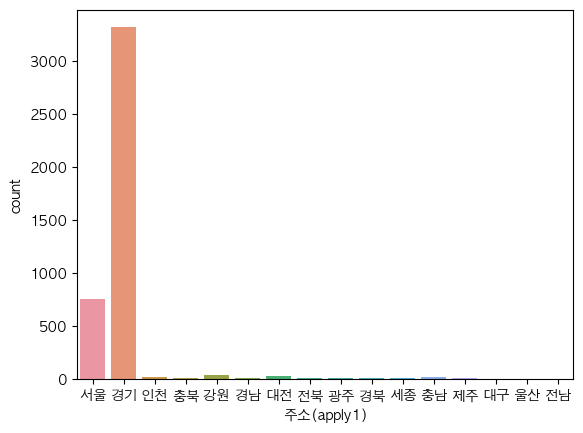

In [14]:
sns.countplot(data=df1, x='주소(apply1)')

In [18]:
df1['연령'] = 2021-df1['생년']

In [21]:
df1['연령'].describe()

count      4283.000000
mean          9.032921
std        3025.409511
min     -197916.000000
25%          44.000000
50%          52.000000
75%          63.000000
max        1828.000000
Name: 연령, dtype: float64

In [22]:
import numpy as np

In [23]:
cond1 = df1['연령'] > 0
cond2 = df1['연령'] < 100

df1.loc[cond1&cond2, '연령(clean)'] = df1['연령']
df1.loc[~(cond1&cond2), '연령(clean)'] = np.nan

In [24]:
df1['연령(clean)'].describe()

count    4277.000000
mean       53.988543
std        12.820361
min        26.000000
25%        44.000000
50%        52.000000
75%        63.000000
max        98.000000
Name: 연령(clean), dtype: float64

<AxesSubplot:xlabel='연령(clean)', ylabel='Count'>

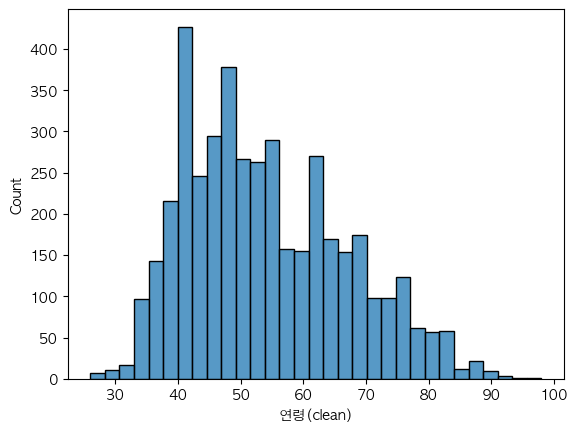

In [25]:
sns.histplot(data=df1, x='연령(clean)')

In [29]:
def func2(row):
    if row >= 90:
        return '90대'
    elif row >= 80:
        return '80대'
    elif row >= 70:
        return '70대'
    elif row >= 60:
        return '60대'
    elif row >= 50:
        return '50대'
    elif row >= 40:
        return '40대'
    elif row >= 30:
        return '30대'
    else:
        return '20대'

df1['연령대'] = df1['연령(clean)'].apply(func2)

In [30]:
df1['연령대'].value_counts()

40대    1345
50대    1062
60대     798
30대     478
70대     421
80대     153
20대      19
90대       9
Name: 연령대, dtype: int64

<AxesSubplot:xlabel='연령대', ylabel='count'>

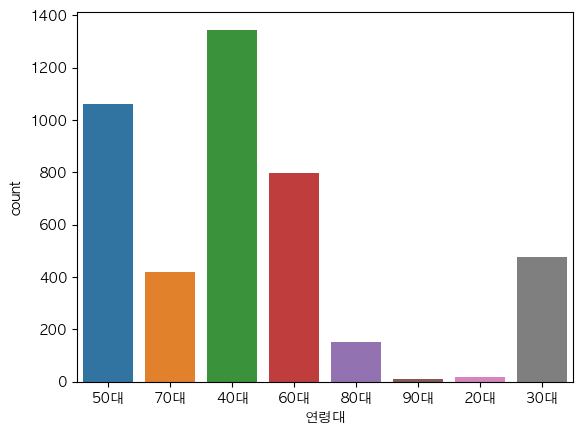

In [31]:
sns.countplot(data=df1, x='연령대')

In [40]:
def func3(row):
    # 결측값은 그대로 결측값으로 처리
    if pd.isnull(row):
        return row
    else:
        result = str(row)
        return result[0] + '0대'

df1['연령대'] = df1['연령(clean)'].apply(func3)

In [41]:
df1['연령대'].value_counts()

40대    1345
50대    1062
60대     798
30대     478
70대     421
80대     153
20대      11
90대       9
Name: 연령대, dtype: int64

In [46]:
def func4(row):
    if '동천' in row:
        return '동천'
    elif '신봉' in row:
        return '신봉'
    elif '풍덕천' in row:
        return '풍덕천'
    elif '성복' in row:
        return '성복'
    elif '상현' in row:
        return '상현'
    elif '서울' in row:
        return '서울'
    elif '수지구' in row:
        return '수지기타'
    elif '경기' in row:
        return '경기기타'
    else :
        return '기타지역'

df1['주소(중분류)'] = df1['주소'].apply(func4)
df1['주소(중분류)'].value_counts()

경기기타    1655
서울       754
풍덕천      509
상현       424
신봉       212
기타지역     208
수지기타     186
성복       181
동천       156
Name: 주소(중분류), dtype: int64

In [47]:
cond1 = (df1['주소(중분류)'] == '경기기타')
df1.loc[cond1]['주소']

16       경기 성남시 분당구 정자동
45       경기 성남시 분당구 동원동
63      경기 오산시 내삼미동 899
68      경기 수원시 영통구 매탄3동
90       경기 용인시 기흥구 보정동
             ...       
4277    경기 고양시 덕양구 화정1동
4278     경기 용인시 기흥구 보정동
4280     경기 성남시 분당구 판교동
4282     경기 성남시 분당구 백현동
4284     경기 수원시 영통구 이의동
Name: 주소, Length: 1655, dtype: object

<AxesSubplot:xlabel='주소(중분류)', ylabel='구매금액(clean)'>

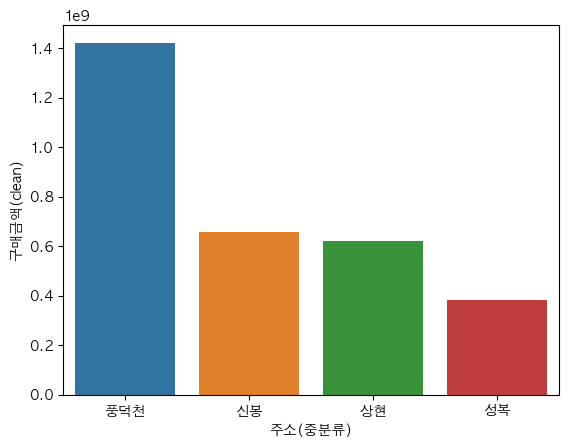

In [52]:
sns.barplot(data=df1, x='주소(중분류)', y='구매금액(clean)', ci=None, estimator=sum, order=['풍덕천','신봉','상현','성복'])

<AxesSubplot:xlabel='연령(clean)', ylabel='구매금액(clean)'>

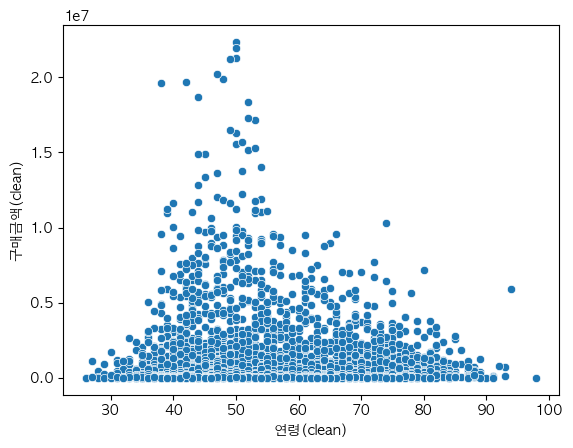

In [54]:
sns.scatterplot(data=df1, x='연령(clean)', y='구매금액(clean)')

<AxesSubplot:xlabel='연령대', ylabel='구매금액(clean)'>

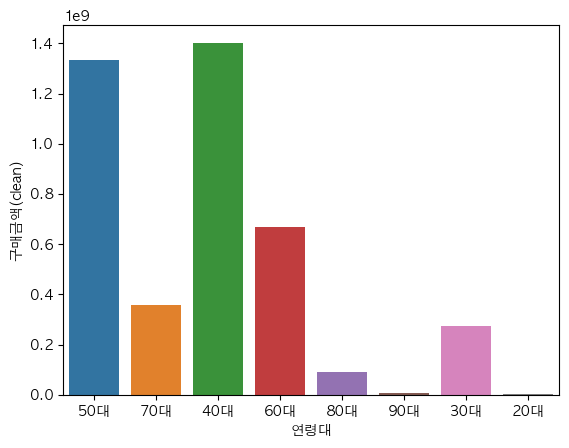

In [55]:
sns.barplot(data=df1, x='연령대', y='구매금액(clean)', estimator=sum, ci=None)

<AxesSubplot:xlabel='연령대', ylabel='축산물(%)'>

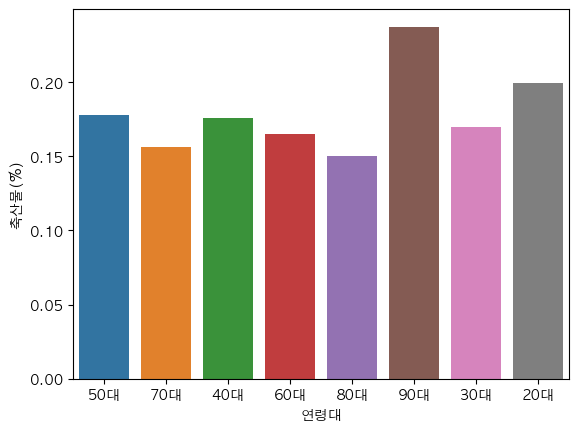

In [56]:
sns.barplot(data=df1, x='연령대', y='축산물(%)', ci=None)

<AxesSubplot:xlabel='연령대', ylabel='간식(%)'>

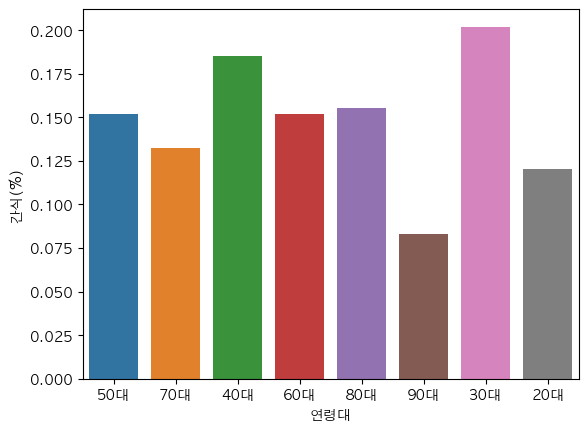

In [58]:
sns.barplot(data=df1, x='연령대', y='간식(%)', ci=None)